In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 41.6MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 116ms/step - loss: 1.5362 - accuracy: 0.5627 - val_loss: 0.6989 - val_accuracy: 0.5946
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.6376 - accuracy: 0.6360 - val_loss: 0.5616 - val_accuracy: 0.6992
Epoch 3/10
625/625 [==============================] - 76s 122ms/step - loss: 0.5427 - accuracy: 0.7204 - val_loss: 0.5467 - val_accuracy: 0.7238
Epoch 4/10
625/625 [==============================] - 74s 117ms/step - loss: 0.4643 - accuracy: 0.7760 - val_loss: 0.4455 - val_accuracy: 0.7908
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4081 - accuracy: 0.8116 - val_loss: 0.4423 - val_accuracy: 0.8006
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3580 - accuracy: 0.8345 - val_loss: 0.5636 - val_accuracy: 0.7648
Epoch 7/10
625/625 [==============================] - 79s 125ms/step - loss: 0.3049 - accuracy: 0.8655 - val_loss: 0.5001 - val_ac

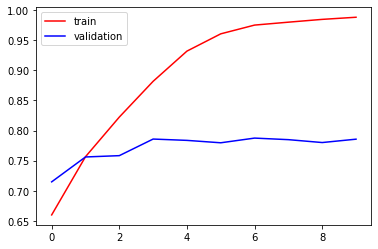

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

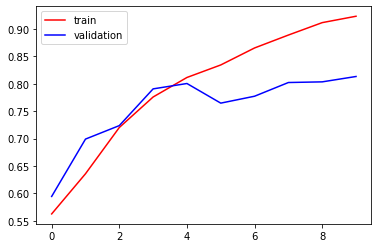

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

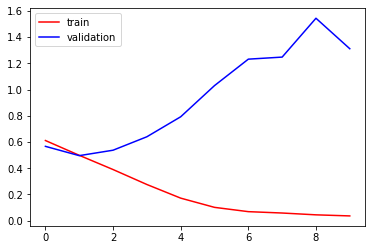

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

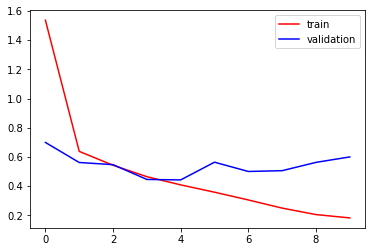

In [19]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Normalization
# Reduce complexity



In [20]:
import cv2

In [24]:
test_img = cv2.imread('/content/dog.jpg')

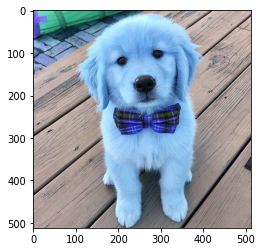

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(512, 512, 3)

In [27]:
test_img  = cv2.resize(test_img, (256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 249ms/step


array([[1.]], dtype=float32)

In [30]:
test_img = cv2.imread('/content/cat.jpg')

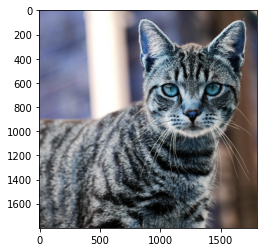

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(1800, 1800, 3)

In [34]:
test_img  = cv2.resize(test_img, (256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 15ms/step


array([[0.]], dtype=float32)